<a href="https://colab.research.google.com/github/HaifaAziz1/IT326-Mushroom-Project/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First step: Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/HaifaAziz1/IT326-Mushroom-Project/refs/heads/main/Dataset/Raw_dataset.csv"
df = pd.read_csv(url)

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


This shows the first 5 rows of the dataset to understand its structure and features

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Statistical summary of the dataset, including count of records, unique values, and most frequent categories

In [ ]:
df.isnull().sum()
(df == '?').sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


Checking for missing values in each column.  We found missing values only for the attribute 'stalk-root'.

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object
Numeric columns: Index([], dtype='object')
No numeric columns found. Using countplots for categorical data instead.


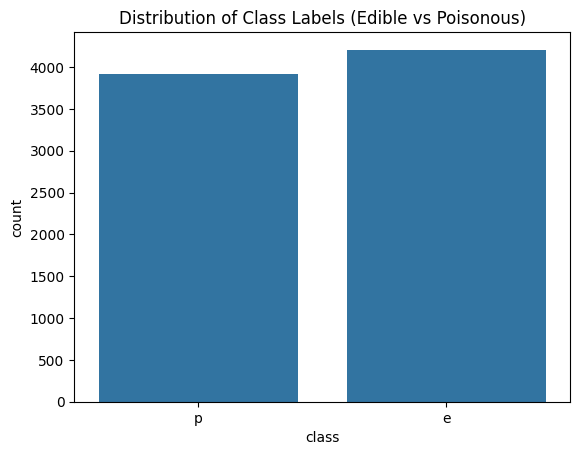

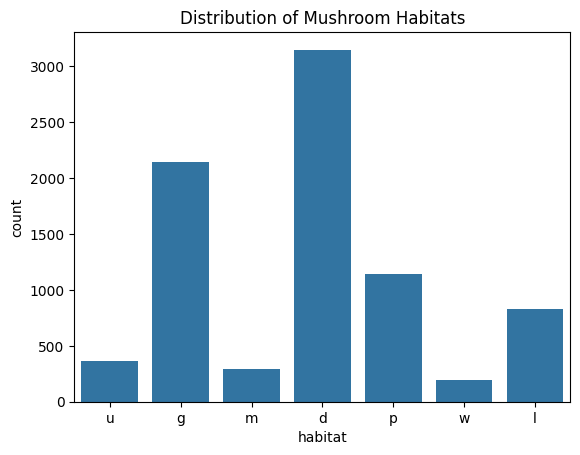

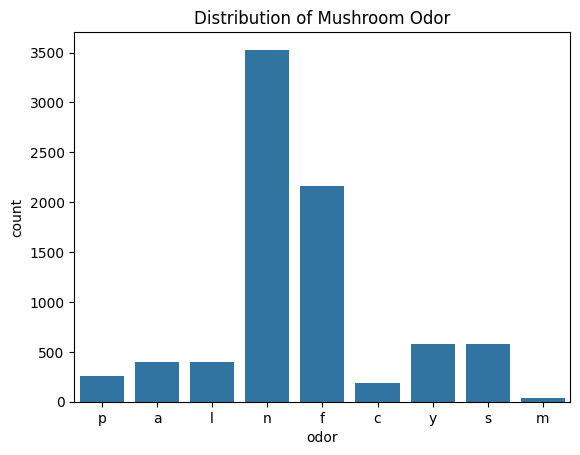

In [ ]:
print(df.dtypes)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", numeric_cols)

if len(numeric_cols) > 0:
    df[numeric_cols].hist(figsize=(12, 8))
    plt.show()
else:
    print("No numeric columns found. Using countplots for categorical data instead.")

sns.countplot(x='class', data=df)
plt.title("Distribution of Class Labels (Edible vs Poisonous)")
plt.show()

sns.countplot(x='habitat', data=df)
plt.title("Distribution of Mushroom Habitats")
plt.show()

sns.countplot(x='odor', data=df)
plt.title("Distribution of Mushroom Odor")
plt.show()

This plot shows the distribution of edible (e) vs poisonous (p) mushrooms. The classes are almost balanced

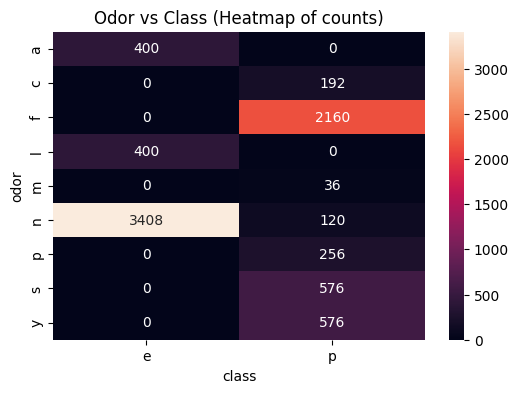

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ct = pd.crosstab(df['odor'], df['class'])
plt.figure(figsize=(6,4))
sns.heatmap(ct, annot=True, fmt='d')
plt.title('Odor vs Class (Heatmap of counts)')
plt.xlabel('class')
plt.ylabel('odor')
plt.show()

This heatmap shows the frequency of each odor value across classes. Some odors strongly correlate with poisonous mushrooms, confirming odor is a discriminative feature

Some missing values were found. The dataset is balanced. Odor is a strong discriminative feature. Data is ready for preprocessing.

# Second step: Pre Processing

In [3]:
#creating a dataframe to store the pre-processed data
df2 = pd.read_csv(url)
df2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Data cleaning:

In [4]:
#replacing missing values with the mode of 'stalk-root'
df2['stalk-root'] = df2['stalk-root'].replace('?', np.nan)
most_common_value = df2['stalk-root'].mode()[0]
df2['stalk-root'] = df2['stalk-root'].fillna(most_common_value)


#detecting & displaying outliers
threshold = 0.01 * len(df2)
for col in df2.columns:
    counts = df2[col].value_counts()
    rare = counts[counts < threshold]
    if not rare.empty:
        print(f"\ncolumn: {col}")
        for category, count in rare.items():
            print(f"category: '{category}' number: {count}")

print("\n===================================")

#reolacing outlier values with 'other'
for col in df2.columns:
    counts = df2[col].value_counts()
    rare = counts[counts < threshold].index
    df2[col] = df2[col].replace(rare, 'Other')
for col in df2.columns:
    print(f"\ncolumn: {col}")
    print(df2[col].value_counts())


column: cap-shape
category: 's' number: 32
category: 'c' number: 4

column: cap-surface
category: 'g' number: 4

column: cap-color
category: 'c' number: 44
category: 'u' number: 16
category: 'r' number: 16

column: odor
category: 'm' number: 36

column: gill-color
category: 'o' number: 64
category: 'r' number: 24

column: stalk-surface-above-ring
category: 'y' number: 24

column: stalk-color-above-ring
category: 'c' number: 36
category: 'y' number: 8

column: stalk-color-below-ring
category: 'c' number: 36
category: 'y' number: 24

column: veil-color
category: 'y' number: 8

column: ring-number
category: 'n' number: 36

column: ring-type
category: 'f' number: 48
category: 'n' number: 36

column: spore-print-color
category: 'r' number: 72
category: 'u' number: 48
category: 'o' number: 48
category: 'y' number: 48
category: 'b' number: 48


column: class
class
e    4208
p    3916
Name: count, dtype: int64

column: cap-shape
cap-shape
x        3656
f        3152
k         828
b         45

We set a threshold of 1% of the dataset size and identified categories below this threshold as rare. Instead of deleting them, we merged all rare categories in each column into a single category called “Other.” This  reduces noise, simplifies the distribution of values and makes the data more balanced.

Encoding values:

In [5]:
#importing encoder & encoding target class
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df2['class'] = label_encoder.fit_transform(df2['class'])

#encoding remaining columns
features = df2.drop('class', axis=1)
encoded_features = pd.get_dummies(features, drop_first=False)

df2 = pd.concat([df2['class'], encoded_features], axis=1).astype(int)

#displaying updated data
print(df2.head(10))
print(df2.dtypes)


   class  cap-shape_Other  cap-shape_b  cap-shape_f  cap-shape_k  cap-shape_x  \
0      1                0            0            0            0            1   
1      0                0            0            0            0            1   
2      0                0            1            0            0            0   
3      1                0            0            0            0            1   
4      0                0            0            0            0            1   
5      0                0            0            0            0            1   
6      0                0            1            0            0            0   
7      0                0            1            0            0            0   
8      1                0            0            0            0            1   
9      0                0            1            0            0            0   

   cap-surface_Other  cap-surface_f  cap-surface_s  cap-surface_y  ...  \
0                  0              

We initially tried using Label Encoding for all categorical features, but it caused issues since it assigns numeric values (e.g., 0, 1, 2…) that create a false sense of order between categories.
This misled the **Chi-Square** test into interpreting relationships that do not actually exist in our data.
Therefore, we switched to **One-Hot Encoding**, which treats each category as a separate binary feature and prevents this problem.

Feature selection:

In [6]:
from sklearn.feature_selection import chi2

#separating target from features
X = df2.drop('class', axis=1)
y = df2['class']

#performing chi-square test to select important features
chi_scores, p_values = chi2(X, y)
chi_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2_Score': chi_scores,
    'p_value': p_values
})
selected_features = chi_results[chi_results['p_value'] < 0.05]
selected_features = selected_features.sort_values(by='Chi2_Score', ascending=False)
X_selected = X[selected_features['Feature']]

#dropping features that are highly correlated
corr_matrix = X_selected.corr()
threshold = 0.75
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column].abs() >= threshold)]
print(f"\nCount of features dropped due to high correlation: {len(to_drop)}")
print("Dropped features:")
for f in to_drop:
    print(f"-  {f}")


#saving final preprocessed dataset
X_final = X_selected.drop(columns=to_drop)
X_final.insert(0, 'class', y)
X_final.to_csv('Preprocessed_dataset.csv', index=False)


#displaying features an
print("\n==================== SUMMARY ====================")
print(f"Total features before selection: {X.shape[1]}")
print(f"Features after Chi-Square: {len(selected_features)}")
print(f"Features dropped due to high correlation: {len(to_drop)}")
print(f"Final number of selected features: {X_final.shape[1]}")
print("==================================================")
print("\nFinal features:")
for f in X_final.columns.tolist():
    print(f"- {f}")



Count of features dropped due to high correlation: 19
Dropped features:
-  gill-size_n
-  spore-print-color_h
-  ring-type_l
-  bruises_t
-  bruises_f
-  spore-print-color_w
-  gill-size_b
-  stalk-surface-above-ring_s
-  stalk-surface-below-ring_s
-  stalk-color-above-ring_o
-  gill-spacing_c
-  gill-attachment_a
-  stalk-surface-below-ring_y
-  stalk-color-above-ring_Other
-  odor_Other
-  ring-number_Other
-  stalk-shape_t
-  ring-number_o
-  veil-color_w

==================== SUMMARY ====================
Total features before selection: 105
Features after Chi-Square: 99
Features dropped due to high correlation: 19
Final number of selected features: 81

Final features:
- class
- odor_n
- odor_f
- stalk-surface-above-ring_k
- stalk-surface-below-ring_k
- gill-color_b
- ring-type_p
- spore-print-color_n
- spore-print-color_k
- gill-spacing_w
- population_v
- habitat_p
- odor_y
- odor_s
- gill-color_n
- stalk-color-above-ring_g
- stalk-color-below-ring_g
- stalk-color-below-ring_b
- s

In this step, we used **Chi-Square** test was to evaluate the relationship between each feature and the target variable.
Features that had *p-values* lower than the threshold were considered important and kept.
After that, we did a correlation analysis to find features that were too similar to each other. Any features with a correlation higher than 0.75 were removed to avoid redundancy.

Finally, we summarized how many features we started with, how many were kept after Chi-Square, how many were dropped due to high correlation and how many will remain as final features for model training.

Final samples:

In [7]:
print("======  Sample of Raw Dataset ======")
print(df.head(2))


print("\n======  Sample of Preprocessed Dataset ======")
print(X_final.head(2))

======  Sample of Raw Dataset ======
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  

[2 rows x 23 columns]

======  Sample of Preprocessed Dataset ======
   class  odor_n  odor_f  stalk-surface-above-ring_k  \
0     